# Simulated time series

This is an example of using [fem](http://lbm.niddk.nih.gov/mckennajp/fem).

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fem

In [92]:
n, m, degs = 10, 3, [1]
par = fem.simulate.model_parameters(n, m, degs)

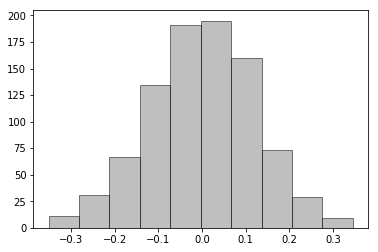

In [93]:
par_flat = np.hstack([p for p in par.itervalues()]).flatten()
tmp = plt.hist(par_flat, bins=n, fc='0.5', ec='k', alpha=0.5)

In [94]:
x = fem.simulate.time_series(par, n, m, o=10.0)
print 'variable, states, average'
for i in range(n):
    print '%i, %s, %f' % (i, np.unique(x[i]), x[i].mean())

variable, states, average
0, [0 1 2], 0.988333
1, [0 1 2], 1.012222
2, [0 1 2], 0.995667
3, [0 1 2], 1.010556
4, [0 1 2], 0.980667
5, [0 1 2], 1.001000
6, [0 1 2], 1.000222
7, [0 1 2], 0.998444
8, [0 1 2], 1.002667
9, [0 1 2], 0.976000


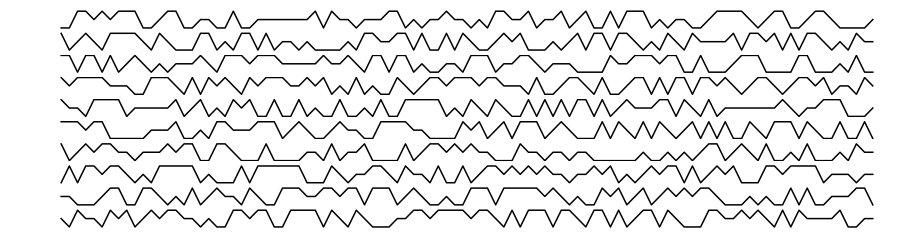

In [95]:
fig, ax = plt.subplots(n, 1, figsize=(16,4))
for i in range(n):
    ax[i].plot(x[i, :100], 'k-')
    ax[i].axis('off')

In [96]:
x1, x2 = x[:, :-1], x[:, 1:]
par_fit, disc = fem.fit.fit(x1, x2, degs, iters=20)

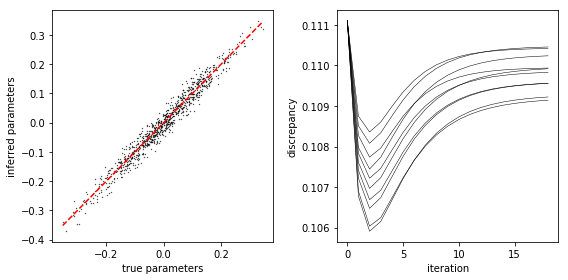

In [97]:
par_fit_flat = np.hstack([p for p in par_fit.itervalues()]).flatten()

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].scatter(par_flat, par_fit_flat, c='k', s=0.1)
lo, hi = par_flat.min(), par_flat.max()
grid = np.linspace(lo, hi)
ax[0].plot(grid, grid, 'r--')
ax[0].set_xlabel('true parameters')
ax[0].set_ylabel('inferred parameters')

for d in disc:
    ax[1].plot(d, 'k-', lw=0.5)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('discrepancy')
    
plt.tight_layout()
plt.show()

In [98]:
print fem.fortran_module.fortran_module.discrete_fit.__doc__

par,disc,iter = discrete_fit(x,y,m_x,m_y,m_y_sum,degs,x_oh_pinv1,x_oh_pinv2,x_oh_pinv3,iters,overfit)

Wrapper for ``discrete_fit``.

Parameters
----------
x : input rank-2 array('i') with bounds (n_x,l)
y : input rank-2 array('i') with bounds (n_y,l)
m_x : input rank-1 array('i') with bounds (n_x)
m_y : input rank-1 array('i') with bounds (n_y)
m_y_sum : input int
degs : input rank-1 array('i') with bounds (n_deg)
x_oh_pinv1 : input rank-2 array('d') with bounds (l,x_oh_rank)
x_oh_pinv2 : input rank-1 array('d') with bounds (x_oh_rank)
x_oh_pinv3 : input rank-2 array('d') with bounds (x_oh_rank,n_s)
iters : input int
overfit : input int

Returns
-------
par : rank-2 array('d') with bounds (m_y_sum,n_s)
disc : rank-2 array('d') with bounds (n_y,iters)
iter : rank-1 array('i') with bounds (n_y)



In [99]:
print fem.fortran_module.fortran_module.simulate_time_series.__doc__

x = simulate_time_series(par,m,l,degs)

Wrapper for ``simulate_time_series``.

Parameters
----------
par : input rank-2 array('d') with bounds (m_sum,n_s)
m : input rank-1 array('i') with bounds (n)
l : input int
degs : input rank-1 array('i') with bounds (n_deg)

Returns
-------
x : rank-2 array('i') with bounds (n,l)

